In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

In [2]:
data=pd.read_excel("loan.xlsx")

### Reading the data

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Dropping all NA columns 

In [4]:
data.dropna(axis=1,inplace=True,how="all")

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaT,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaT,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,2016-06-01,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [7]:
for col in data.columns:
    print(col," ",data[col].dtype)

id   int64
member_id   int64
loan_amnt   int64
funded_amnt   int64
funded_amnt_inv   float64
term   object
int_rate   float64
installment   float64
grade   object
sub_grade   object
emp_title   object
emp_length   object
home_ownership   object
annual_inc   float64
verification_status   object
issue_d   datetime64[ns]
loan_status   object
pymnt_plan   object
url   object
desc   object
purpose   object
title   object
zip_code   object
addr_state   object
dti   float64
delinq_2yrs   int64
earliest_cr_line   datetime64[ns]
inq_last_6mths   int64
mths_since_last_delinq   float64
mths_since_last_record   float64
open_acc   int64
pub_rec   int64
revol_bal   int64
revol_util   float64
total_acc   int64
initial_list_status   object
out_prncp   float64
out_prncp_inv   float64
total_pymnt   float64
total_pymnt_inv   float64
total_rec_prncp   float64
total_rec_int   float64
total_rec_late_fee   float64
recoveries   float64
collection_recovery_fee   float64
last_pymnt_d   datetime64[ns]
last_pymnt

### Dropping columns with only 1 unique value (i.e no variation in this feature)

In [8]:
for col in data.columns:
    if(len(pd.unique(data[col]))==1):
        data.drop(col,inplace=True,axis=1)
    

In [9]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0,0.0,0.0,0.0


In [10]:
data.shape

(39717, 51)

In [11]:
data.iloc[:,2:].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,0.118600,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


### identifying the numeric , categorical and time series columns

In [12]:
int_col=[]
for col in data.columns:
    if(col in data.describe().columns):
        int_col.append(col)

In [13]:
cat_col=[]
for col in data.columns:
    if(data[col].dtype=="O" and col!="loan_status"):
        cat_col.append(col)

In [14]:
for col in data.columns:
    if(data[col].dtype!="O" and col not in data.iloc[:,:].describe().columns):
        print(col)

issue_d
earliest_cr_line
last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [15]:
time_col=["issue_d","earliest_cr_line","last_pymnt_d","next_pymnt_d","last_credit_pull_d"]

### Dropping the URL column and correcting the zip code column

In [16]:
data_to_cat=data[int_col+cat_col+time_col+["loan_status"]].copy()
data_to_cat.drop("url",axis=1,inplace=True)

In [17]:
data_to_cat["zip_code"]=data_to_cat["zip_code"].str[:3]

In [18]:
data_to_cat.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,purpose,title,zip_code,addr_state,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,loan_status
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,...,credit_card,Computer,860,AZ,2011-12-01,1985-01-01,2015-01-01,NaT,2016-05-01,Fully Paid
1,1077430,1314167,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,...,car,bike,309,GA,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01,Charged Off
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,...,small_business,real estate business,606,IL,2011-12-01,2001-11-01,2014-06-01,NaT,2016-05-01,Fully Paid
3,1076863,1277178,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,...,other,personel,917,CA,2011-12-01,1996-02-01,2015-01-01,NaT,2016-04-01,Fully Paid
4,1075358,1311748,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,...,other,Personal,972,OR,2011-12-01,1996-01-01,2016-05-01,2016-06-01,2016-05-01,Current


### Dropping columns with more than 50% NA values and updating the numeric and categorical column lists

In [19]:
for col in data_to_cat.columns:
#     print("\n",col)
    x=data_to_cat.loc[:,col].isnull()
#     print("Percent NA values :",sum(x)*100/len(x))
    if(sum(x)*100/len(x)>=50):
        data_to_cat.drop(col,inplace=True,axis=1)

In [20]:
int_col=[]
for col in data_to_cat.columns:
    if(col in data_to_cat.describe().columns):
        int_col.append(col)

In [21]:
cat_col=[]
for col in data_to_cat.columns:
    if(data_to_cat[col].dtype=="O" and col!="loan_status"):
        cat_col.append(col)


In [22]:
for col in data_to_cat.columns:
    if(data_to_cat[col].dtype!="O" and col not in data_to_cat.iloc[:,:].describe().columns):
        print(col)

issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d


In [23]:
time_col=["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]

In [24]:
data_to_cat.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,desc,purpose,title,zip_code,addr_state,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,loan_status
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,2011-12-01,1985-01-01,2015-01-01,2016-05-01,Fully Paid
1,1077430,1314167,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,2011-12-01,1999-04-01,2013-04-01,2013-09-01,Charged Off
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,...,NaN,small_business,real estate business,606,IL,2011-12-01,2001-11-01,2014-06-01,2016-05-01,Fully Paid
3,1076863,1277178,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,2011-12-01,1996-02-01,2015-01-01,2016-04-01,Fully Paid
4,1075358,1311748,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972,OR,2011-12-01,1996-01-01,2016-05-01,2016-05-01,Current


### Identifying columns with NA values 

In [25]:
for col in data_to_cat.columns:
    if(any(data_to_cat[col].isnull())):
        print(col)
    
    

revol_util
collections_12_mths_ex_med
chargeoff_within_12_mths
pub_rec_bankruptcies
tax_liens
emp_title
emp_length
desc
title
last_pymnt_d
last_credit_pull_d


In [26]:
int_na=[]
for col in data_to_cat.columns:
    if(any(data_to_cat[col].isnull()) and col in int_col):
        print(col,sum(data_to_cat[col].isnull()))
        int_na.append(col)

revol_util 50
collections_12_mths_ex_med 56
chargeoff_within_12_mths 56
pub_rec_bankruptcies 697
tax_liens 39


In [27]:
dum=data_to_cat[data_to_cat["pub_rec_bankruptcies"].isnull()]
dum[dum["loan_status"]=="Charged Off"].shape

(118, 47)

In [28]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state']

### Checking correlation among features

In [29]:
data_to_cat.iloc[:,2:].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,...,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,NaN,NaN,-0.037180,NaN
funded_amnt,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,...,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,...,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,NaN,NaN,-0.042746,NaN
int_rate,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,0.010395,...,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,NaN,NaN,0.082550,NaN
installment,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,...,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,NaN,NaN,-0.034103,NaN
annual_inc,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,...,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,NaN,NaN,-0.016801,NaN
dti,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,...,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,...,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,NaN,NaN,0.003375,NaN
inq_last_6mths,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,...,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,NaN,NaN,0.016346,NaN
open_acc,0.177168,0.175530,0.163027,0.010395,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,...,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,NaN,NaN,0.005930,NaN


### Plotting a histogram of each feature separated by the loan status to see the variability

Text(0.5,0.98,'NOTE: Columns with NA values are not plotted')

<Figure size 432x288 with 0 Axes>

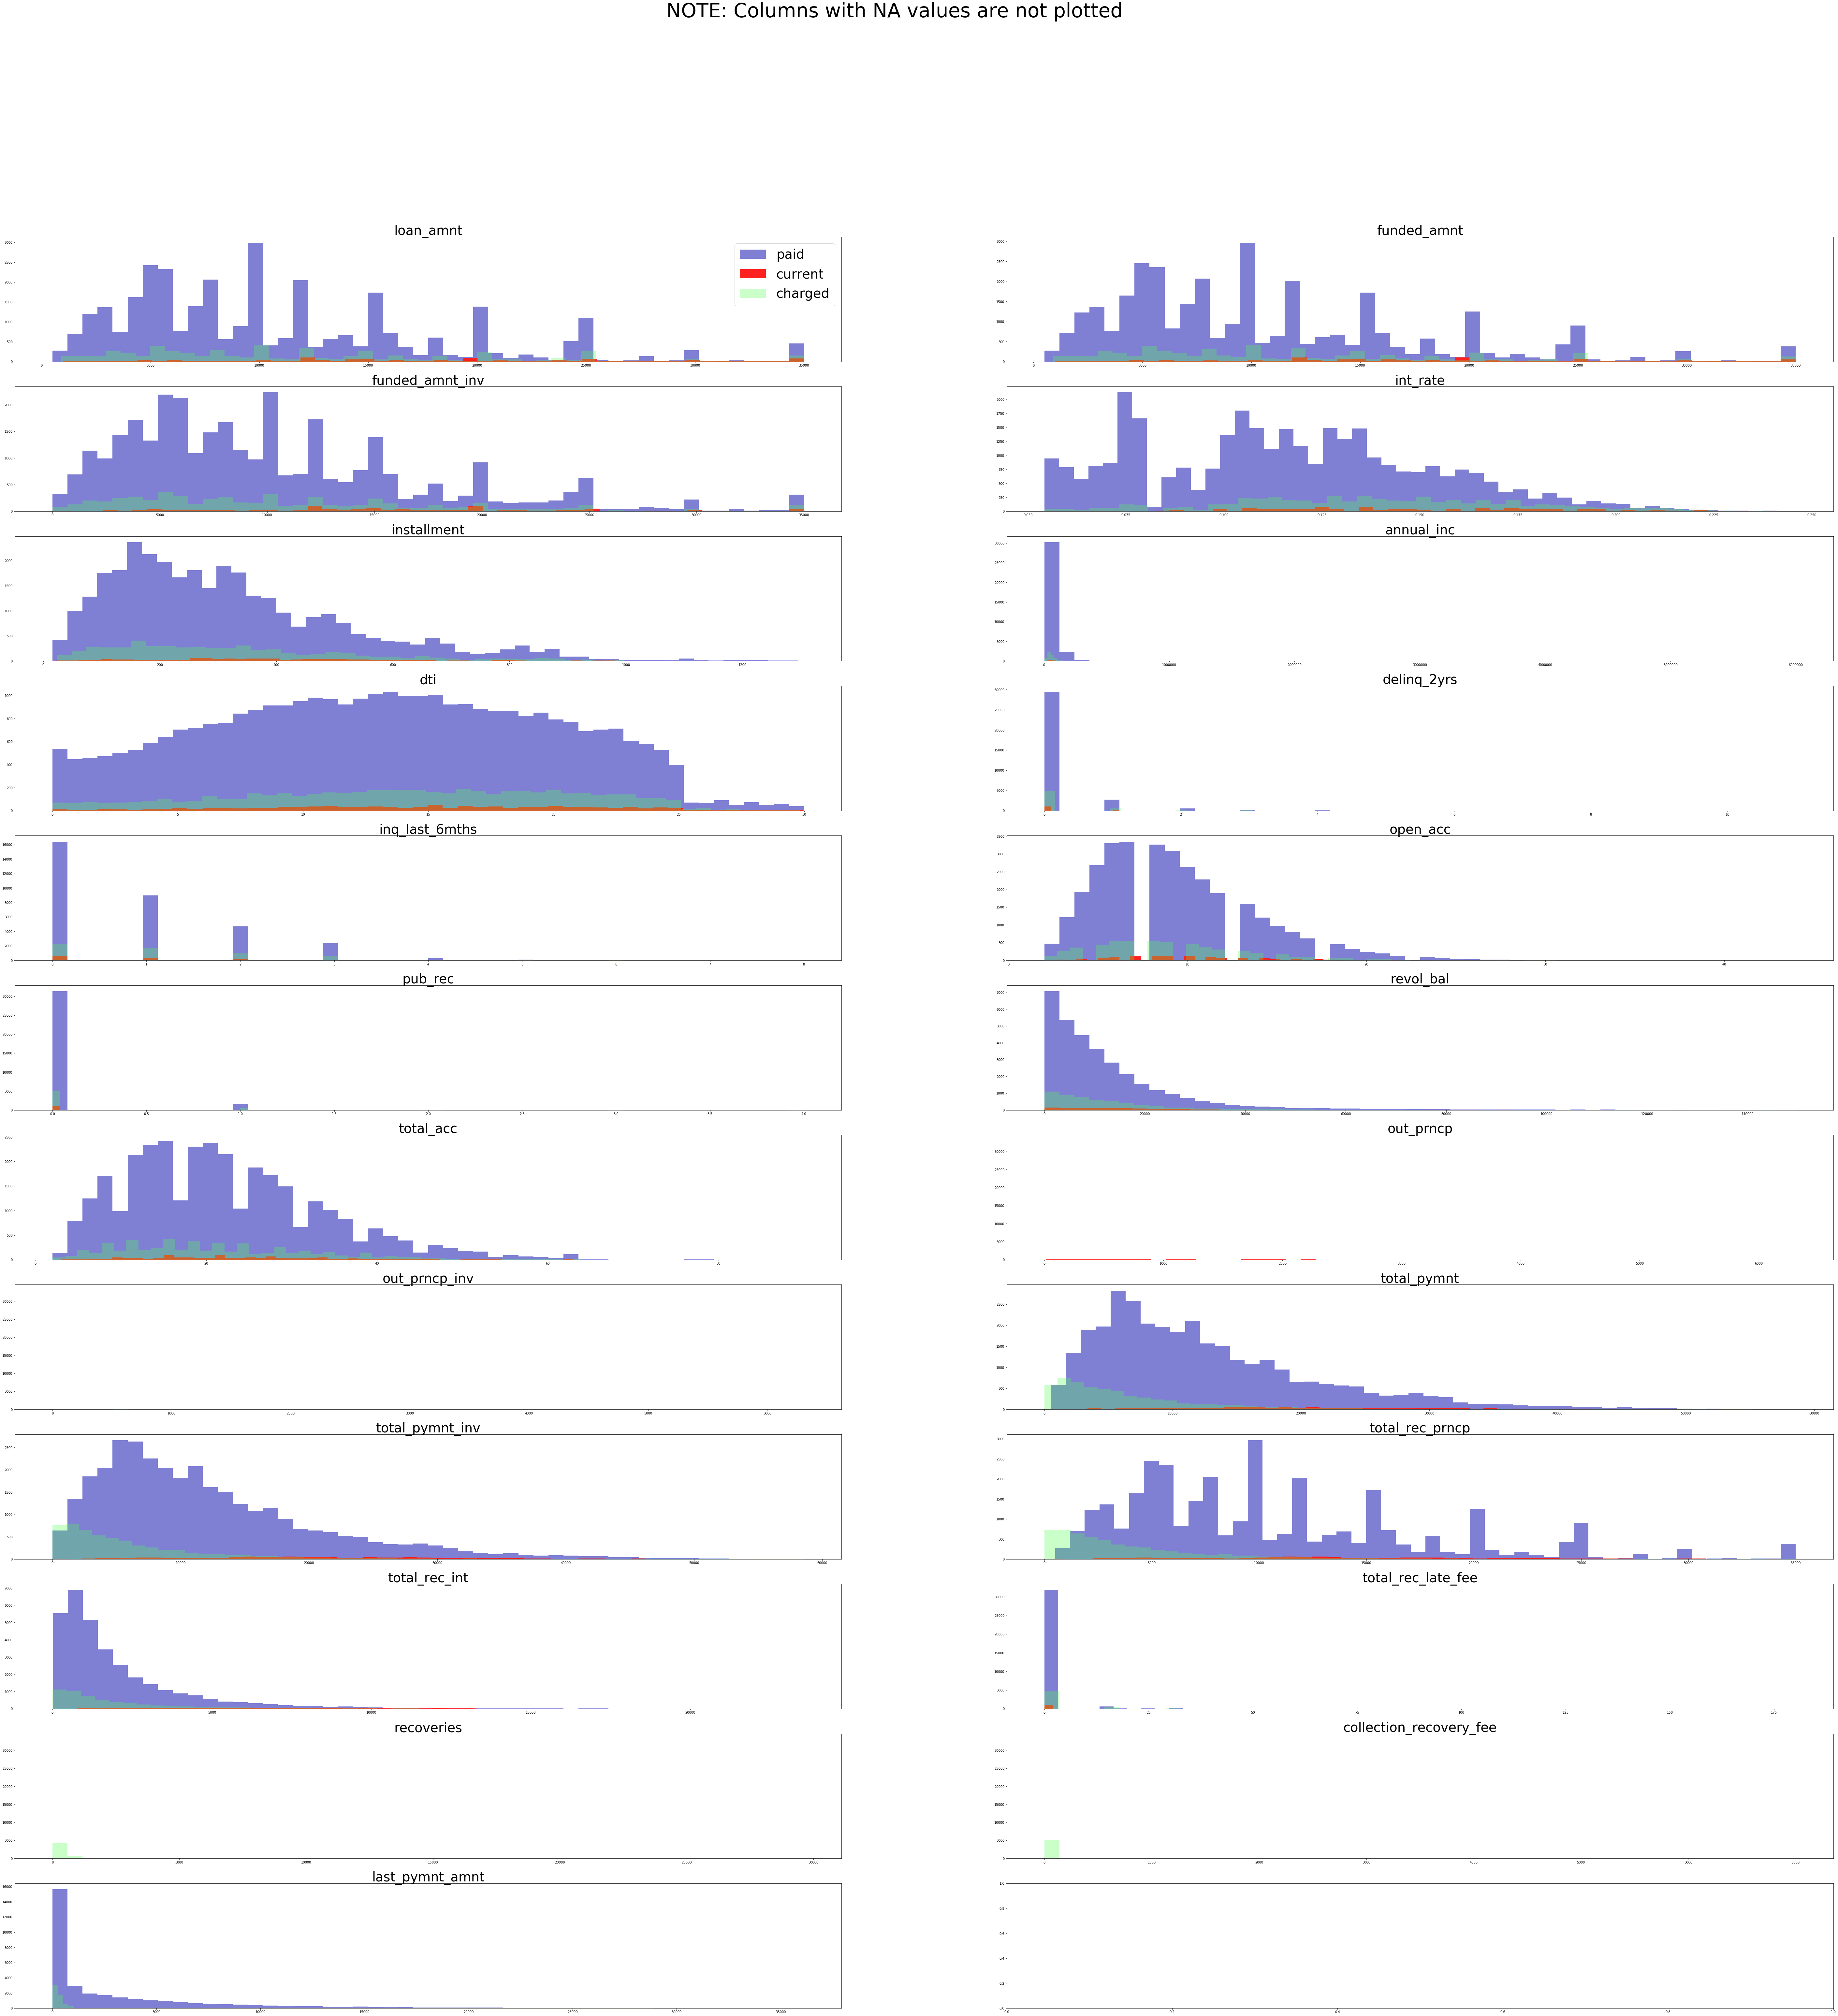

In [30]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=5, wspace=None, hspace=5)
fig,axes =plt.subplots(12,2,figsize=(100,100))
# fig.tight_layout() 
paid=data_to_cat[data_to_cat["loan_status"]=="Fully Paid"].loc[:,int_col].iloc[:,2:]
current=data_to_cat[data_to_cat["loan_status"]=="Current"].loc[:,int_col].iloc[:,2:]
charged=data_to_cat[data_to_cat["loan_status"]=="Charged Off"].loc[:,int_col].iloc[:,2:]
ax=axes.ravel()
j=0
for i in range(25):
    if all(data_to_cat.loc[:,int_col[2:]].iloc[:,i].notnull()):
        bins=50
    #     _,bins=np.histogram(data_to_cat[int_col][:,i],bins=50)
        ax[j].hist(paid.iloc[:,i].values,bins=bins,color=mglearn.cm3(0),alpha=0.5)
        ax[j].hist(current.iloc[:,i].values,bins=bins,color=mglearn.cm3(1),alpha=1)
        ax[j].hist(charged.iloc[:,i].values,bins=bins,color=mglearn.cm3(2),alpha=0.3)
        ax[j].set_title(data_to_cat[int_col].columns[i+2],fontsize=40)
        j=j+1
ax[0].legend(["paid","current","charged"],fontsize=40)
fig.suptitle("NOTE: Columns with NA values are not plotted",fontsize=60)

In [31]:
data_to_cat["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [32]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state']

In [33]:
len(int_col)

30

In [34]:
req_int_col=['id','member_id','loan_amnt','int_rate','installment','annual_inc','dti','inq_last_6mths','open_acc','pub_rec','pub_rec_bankruptcies']

### Boxplots of selected numeric columns between the charged off and fully paid

In [35]:
data_final=data_to_cat.copy()[data_to_cat["loan_status"]!="Current"]

In [36]:
data_final.shape

(38577, 47)

In [37]:
data_charged=data_final[data_final["loan_status"]=="Charged Off"]
data_paid=data_final[data_final["loan_status"]=="Fully Paid"]

Text(0.5,0.98,'Numerical Columns')

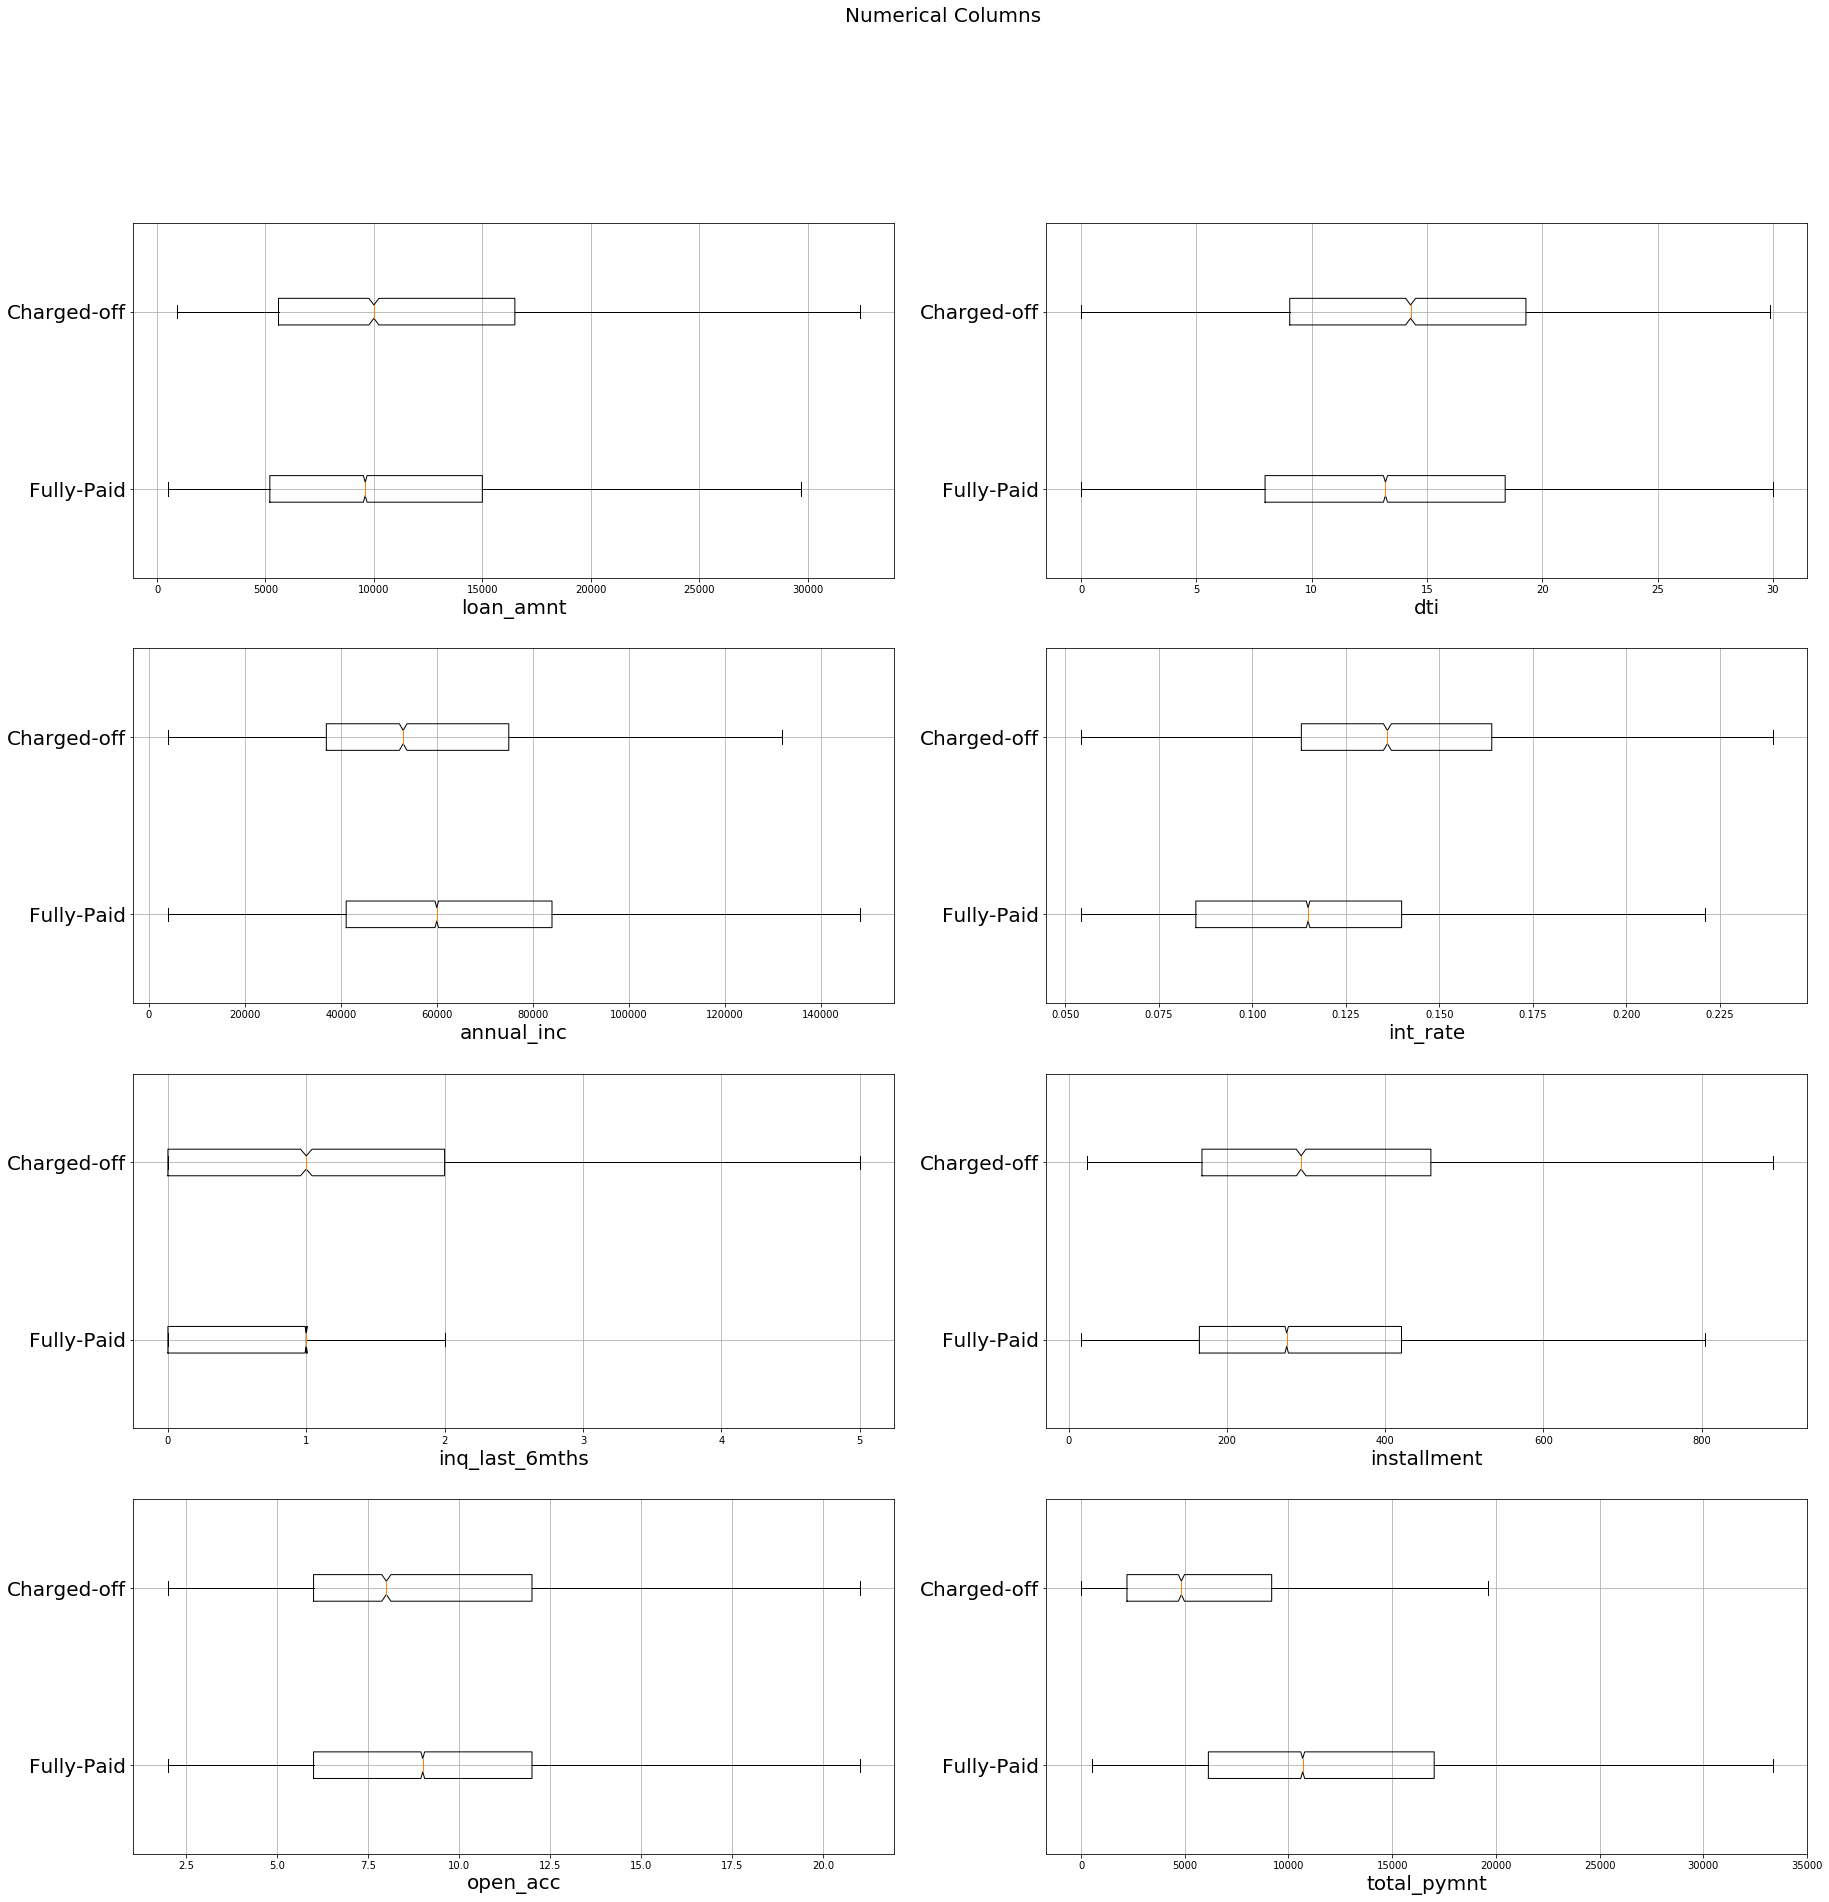

In [38]:
fig,axes=plt.subplots(4,2,figsize=(30,30))
# fig.tight_layout()
cols=["loan_amnt","dti","annual_inc","int_rate","inq_last_6mths","installment","open_acc","total_pymnt"]
for ax,col in zip(axes.ravel(),cols):
    ax.boxplot([data_paid.loc[:,col],data_charged.loc[:,col]],showfliers=False,notch=True,vert=False)
    ax.grid()
    ax.set_xlabel(col,fontsize=20)
    ax.set_yticklabels(["Fully-Paid","Charged-off"],fontsize=20)
fig.suptitle('Numerical Columns',fontsize=20)

In [39]:
data_final=data_final.dropna(axis=0,how="any")

### Making a column indicating the gain of a bank 

In [40]:
data_final["gain"]=round((data_final["total_pymnt"]-data_final["funded_amnt"])*100/data_final["funded_amnt"],2)


### Checking whether there is a significant difference between gain of the bank among the charged -off and fully-paid people

[Text(0,0,'Charged-off'), Text(0,0,'Fully-Paid')]

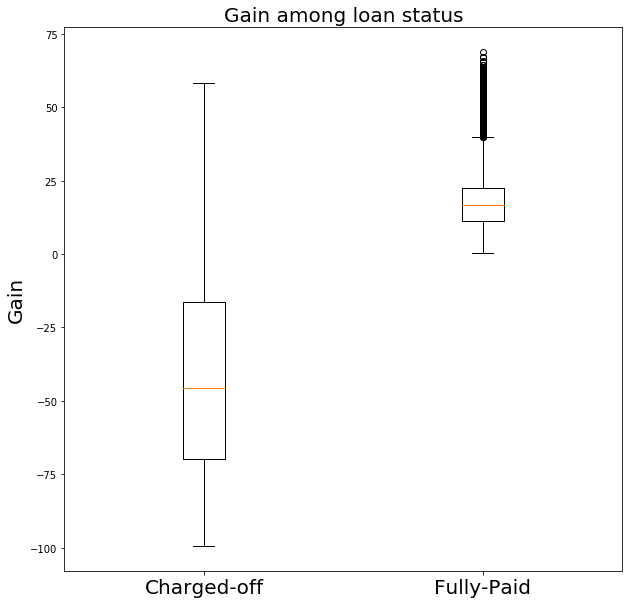

In [41]:
data_final.groupby("loan_status").agg({"gain":np.median})
fig,axis=plt.subplots(figsize=(10,10))
axis.boxplot([data_final[data_final["loan_status"]=="Charged Off"].gain,data_final[data_final["loan_status"]=="Fully Paid"].gain])
axis.set_ylabel("Gain",fontsize=20)
axis.set_title("Gain among loan status",fontsize=20)
axis.set_xticklabels(["Charged-off","Fully-Paid"],fontsize=20)

This clearly shows that fully-paid people give a significantly more gain to the bank than the charged-off people.
This incidcates that the bank suffers a graeat change in gain when there are caases of Charged-off loans

Text(0.5,0,'Gain')

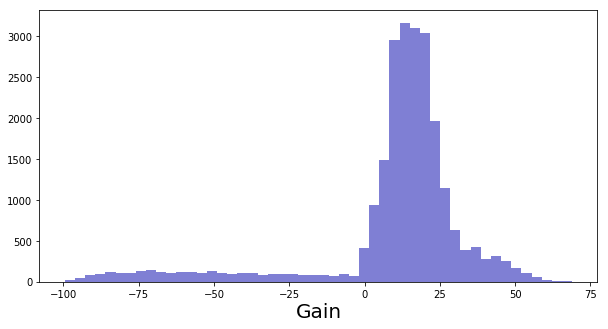

In [42]:
fig,axis=plt.subplots(figsize=(10,5))
axis.hist(data_final["gain"].values,color=mglearn.cm3(0),bins=50,alpha=0.5)
axis.set_xlabel("Gain",fontsize=20)

 The gain is highly skewed(left) so, median would be a better measure for comparison of variability of gain among the categorical variables

Text(0,0.5,'Gain')

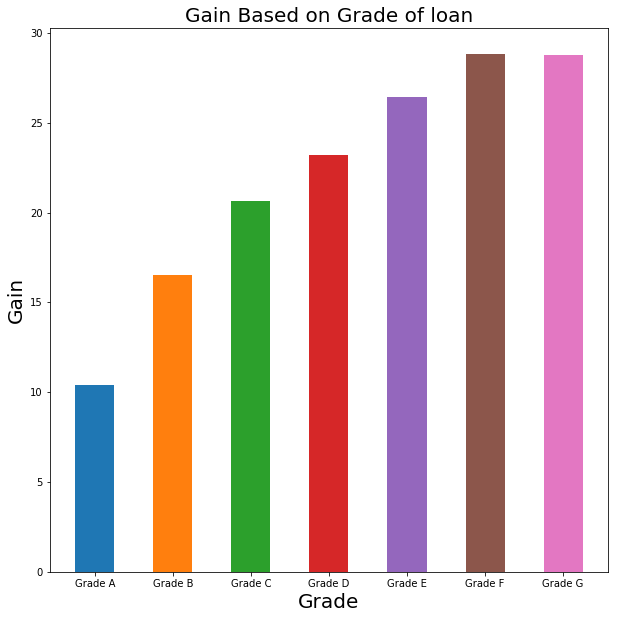

In [43]:
grade_rel=data_final.groupby("grade").agg({"gain":np.median})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(7)
width=0.5
for i,value in zip(index,grade_rel["gain"].values):
    ax.bar(i,value,width)
ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"])
ax.set_title("Gain Based on Grade of loan",fontsize=20)
ax.set_xlabel("Grade",fontsize=20)
ax.set_ylabel("Gain",fontsize=20)

This shows that loans roughly after Grade D have more gain than the Grades below D indicatinng that these grades such as A and B might be having people who would potentially charge-off.

Text(0,0.5,'Count')

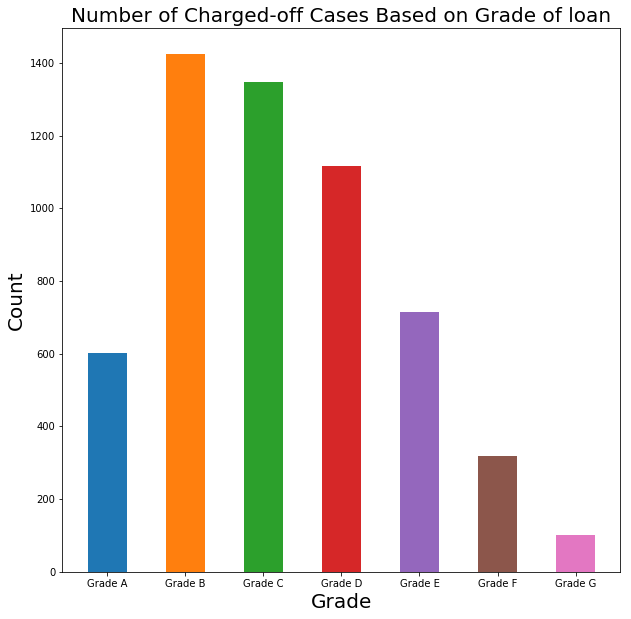

In [44]:
grade_rel=data_charged.groupby("grade").agg({"loan_status":'count'})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(7)
width=0.5
for i,value in zip(index,grade_rel['loan_status'].values):
    ax.bar(i,value,width)
ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"])
ax.set_title("Number of Charged-off Cases Based on Grade of loan",fontsize=20)
ax.set_xlabel("Grade",fontsize=20)
ax.set_ylabel("Count",fontsize=20)

In [45]:
# fig,axis=plt.subplots(figsize=(10,10))
# axis.hist(data_final["funded_amnt"].values,color=mglearn.cm3(0),bins=50,alpha=0.5)

In [46]:
# data_final.groupby("term").agg({"funded_amnt":np.median})

Text(0.5,0,'Term')

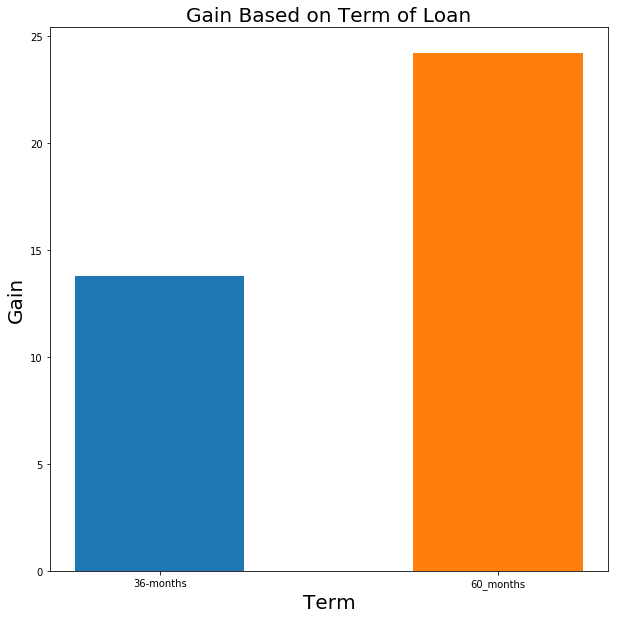

In [47]:
term_rel=data_final.groupby("term").agg({"gain":np.median})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(2)
width=0.5
for i,value in zip(index,term_rel["gain"].values):
    ax.bar(i,value,width)
ax.set_xticks(index)
ax.set_xticklabels(["36-months","60_months"])
ax.set_ylabel("Gain",fontsize=20)
ax.set_title("Gain Based on Term of Loan",fontsize=20)
ax.set_xlabel("Term",fontsize=20)

Well, clearly, gain in term 60 months is greater than  36-months indicating that more likely cases of Charge might be in 36-months terms loans 

Text(0.5,0,'EMP_Length')

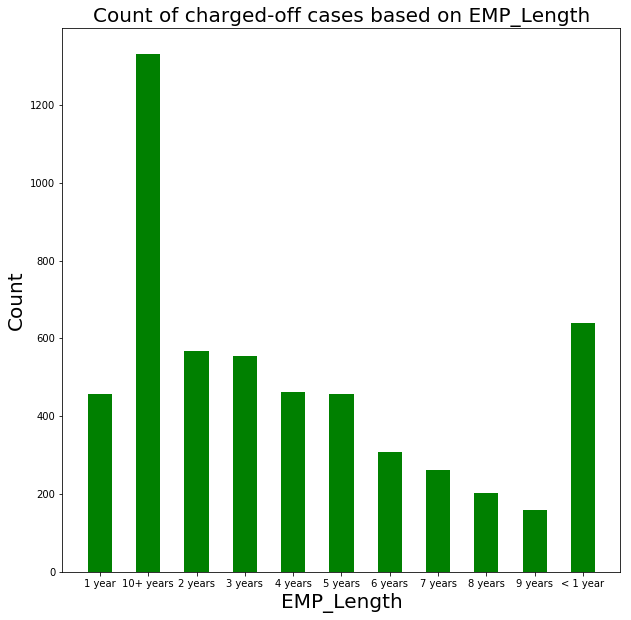

In [48]:
emp_length_rel=data_charged.groupby("emp_length").agg({"loan_status":'count'})
fig,axis=plt.subplots(figsize=(10,10))
index=np.arange(11)
width=0.5
axis.bar(index,emp_length_rel["loan_status"].values,width,label="Charged-off",color='g')
axis.set_xticks(index)
axis.set_xticklabels(emp_length_rel.index)
axis.set_ylabel("Count",fontsize=20)
axis.set_title("Count of charged-off cases based on EMP_Length",fontsize=20)
axis.set_xlabel("EMP_Length",fontsize=20)

Emp length of 10+ years and <1 year is a concern regarding charging off

Text(0.5,0,'House Ownership')

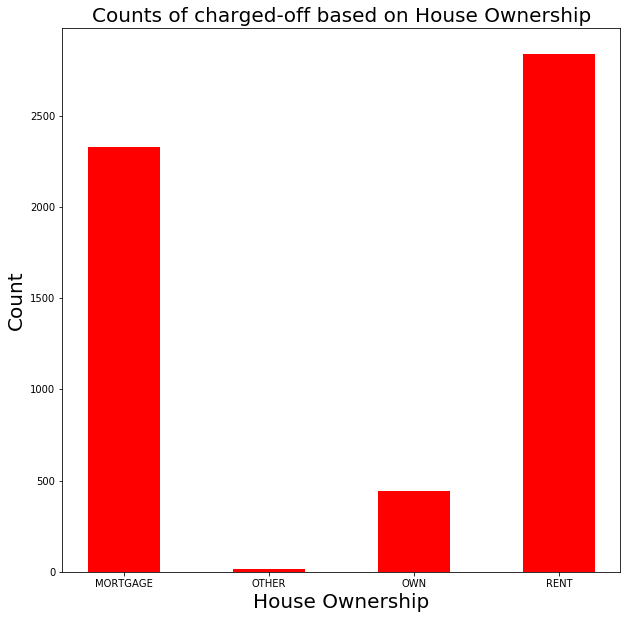

In [49]:
own_rel=data_charged.groupby("home_ownership").agg({"grade":'count'})
fig,axis=plt.subplots(figsize=(10,10))
index=np.arange(4)
width=0.5
axis.bar(index,own_rel["grade"].values,width,label="Charged-off",color='r')
axis.set_xticks(index)
axis.set_xticklabels(own_rel.index)
axis.set_ylabel("Count",fontsize=20)
axis.set_title("Counts of charged-off based on House Ownership",fontsize=20)
axis.set_xlabel("House Ownership",fontsize=20)

The barplot show that most cases of Charged-off are from Rent and Mortgage home owner-ship

Text(0.5,0,'Count')

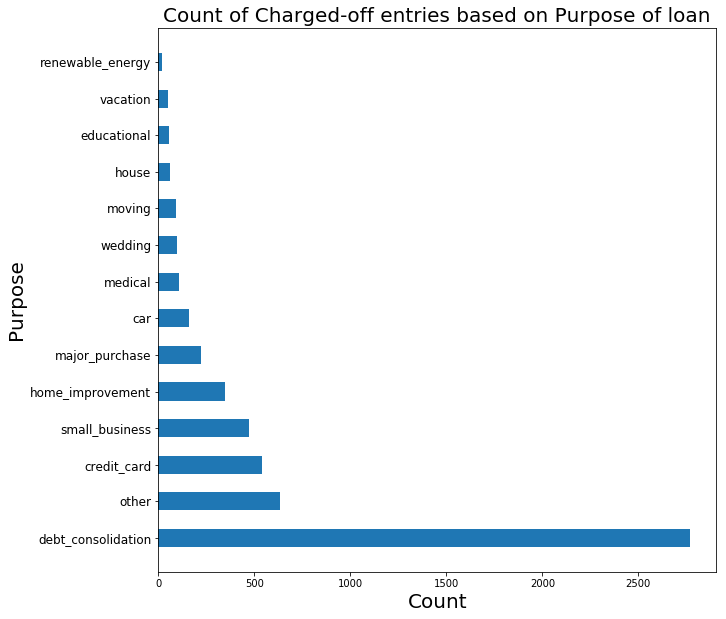

In [50]:
purpose_rel=data_charged["purpose"].value_counts()
fig,axis=plt.subplots(figsize=(10,10))
index=np.arange(14)
width=0.5
axis.barh(index,purpose_rel.values,width,label="Charged-off")
axis.set_yticks(index)
axis.set_yticklabels(purpose_rel.index,fontsize=12)
axis.set_ylabel("Purpose",fontsize=20)
axis.set_title("Count of Charged-off entries based on Purpose of loan",fontsize=20)
axis.set_xlabel("Count",fontsize=20)

Most of the charged-0ff cases are of purpose debt_consolidation and "other purpose" 

Text(0.5,0,'Home Ownership')

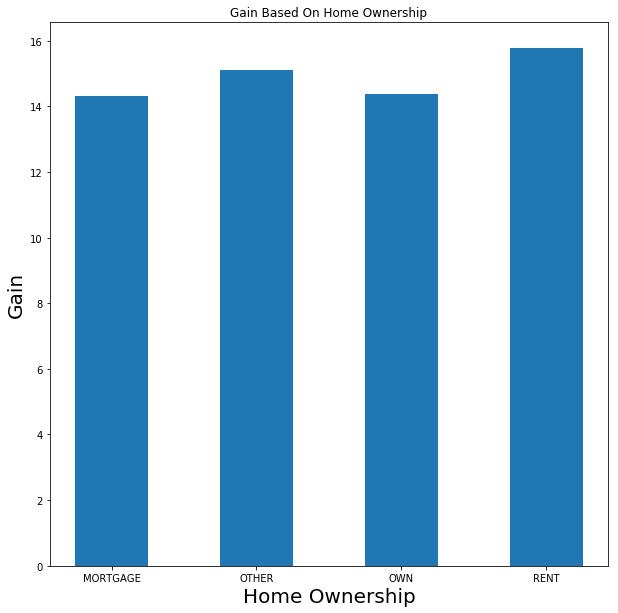

In [51]:
own_rel=data_final.groupby(["home_ownership"]).agg({"gain":np.median})
fig,axis=plt.subplots(figsize=(10,10))
index=np.arange(4)
width=0.5
axis.bar(index,own_rel["gain"].values,width)
axis.set_ylabel("Gain",fontsize=20)
axis.set_title("Gain Based On Home Ownership")
axis.set_xticks(index)
axis.set_xticklabels(own_rel.index)
axis.set_xlabel("Home Ownership",fontsize=20)

Text(0.5,69,'Grade')

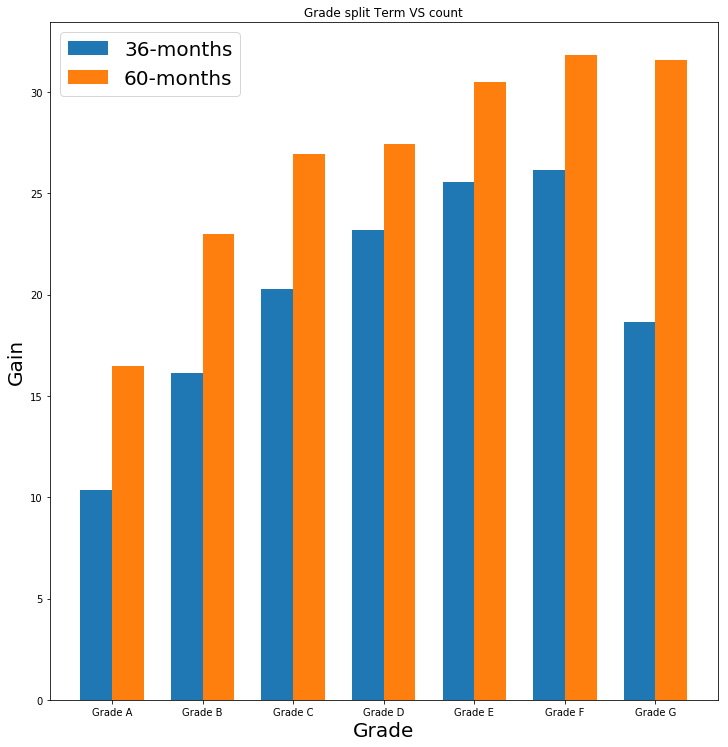

In [52]:
grade_term_comb=data_final.groupby(["term","grade"]).agg({"gain":np.median})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(7)
width=0.35
fig.tight_layout()

ax.bar(index-width/2,grade_term_comb["gain"].values[0:7],width,label="36-months")
ax.bar(index+width/2,grade_term_comb["gain"].values[7:],width,label="60-months")
ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"])
ax.legend(fontsize=20)
ax.set_ylabel("Gain",fontsize=20)
ax.set_title("Grade split Term VS count")
ax.set_xlabel("Grade",fontsize=20)

An importaant thing to note here is that for every grade, the 36-month term loan has a less gain than the 60-month load which suggests more cahrged-off likliness in this term

Secondly, as the grade changes from A to G, the gain in both of the terms is consistently increasing indicating lower chances of Charged- off people 

36-months G grade loan yield lesser gain 

In [53]:
data_final["home_ownership"].value_counts()

RENT        11506
MORTGAGE    10453
OWN          1673
OTHER          94
Name: home_ownership, dtype: int64

Text(0.5,69,'Grade')

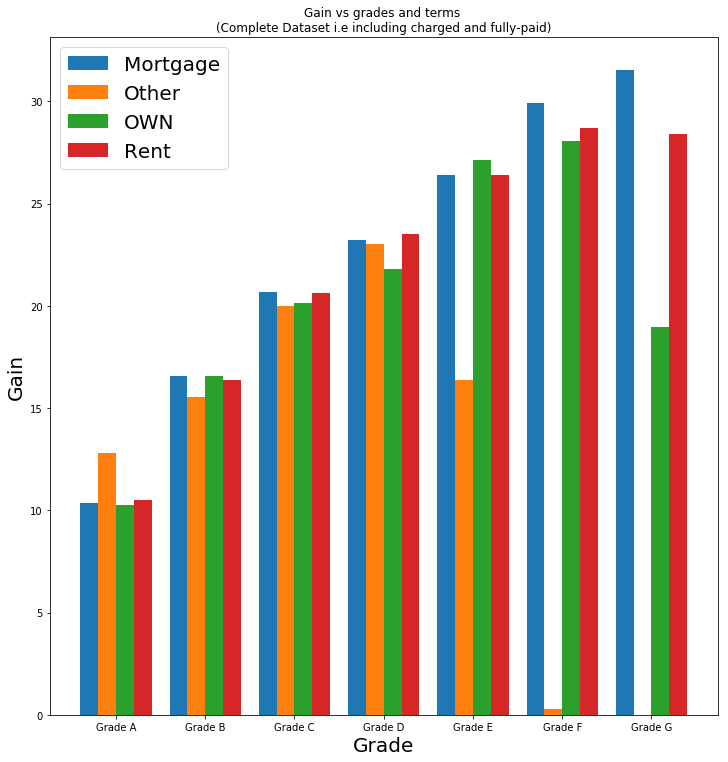

In [54]:
grade_own_comb=data_final.groupby(["home_ownership","grade"]).agg({"gain":np.median})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(7)
width=0.2
fig.tight_layout()

ax.bar(index-3*width/2,grade_own_comb["gain"].values[0:7],width,label="Mortgage")
ax.bar(index[:6]-width/2,grade_own_comb["gain"].values[7:13],width,label="Other")
ax.bar(index+width/2,grade_own_comb["gain"].values[13:20],width,label="OWN")
ax.bar(index+3*width/2,grade_own_comb["gain"].values[20:27],width,label="Rent")

ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"])
ax.legend(fontsize=20)
ax.set_ylabel("Gain",fontsize=20)
ax.set_title("Gain vs grades and terms \n(Complete Dataset i.e including charged and fully-paid)")
ax.set_xlabel("Grade",fontsize=20)

Text(0.5,69,'Grade')

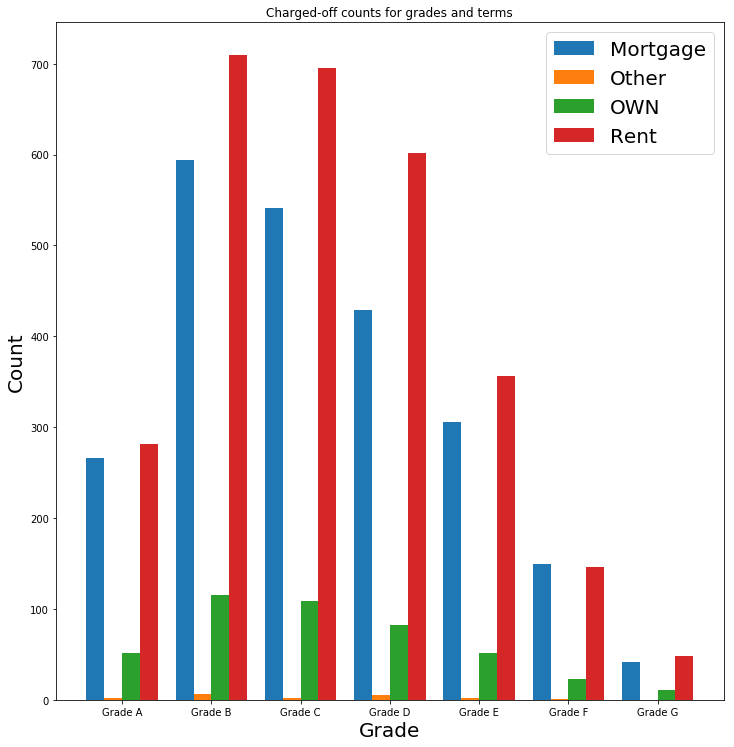

In [55]:
grade_own_comb2=data_charged.groupby(["home_ownership","grade"]).agg({"purpose":'count'})
fig,ax=plt.subplots(figsize=(10,10))
index=np.arange(7)
width=0.2
fig.tight_layout()

ax.bar(index-3*width/2,grade_own_comb2["purpose"].values[0:7],width,label="Mortgage")
ax.bar(index[:6]-width/2,grade_own_comb2["purpose"].values[7:13],width,label="Other")
ax.bar(index+width/2,grade_own_comb2["purpose"].values[13:20],width,label="OWN")
ax.bar(index+3*width/2,grade_own_comb2["purpose"].values[20:27],width,label="Rent")

ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"])
ax.legend(fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_title("Charged-off counts for grades and terms")
ax.set_xlabel("Grade",fontsize=20)

Both the count and gain plots support each other . The charged-off counts along the groups decreases from A to G and hence the profit increases along A to G. The mortgage and rent count are the highest for being charged-off.
 The number of mortgage and rent charged off counts decrease from A to G and consequently, the gain of mortgage is increasing from A to G

 Well, there seems to be no relation between the gain and home_ownership . Specifically, for the Grade F and somewhat G, the gain seems to be extremely low for the non_mortgaged house owners

 Most of the charged-off loan had a purpose of debt_consolidation followed by other and credit cards and samll_business

Text(0.5,0,'Grade')

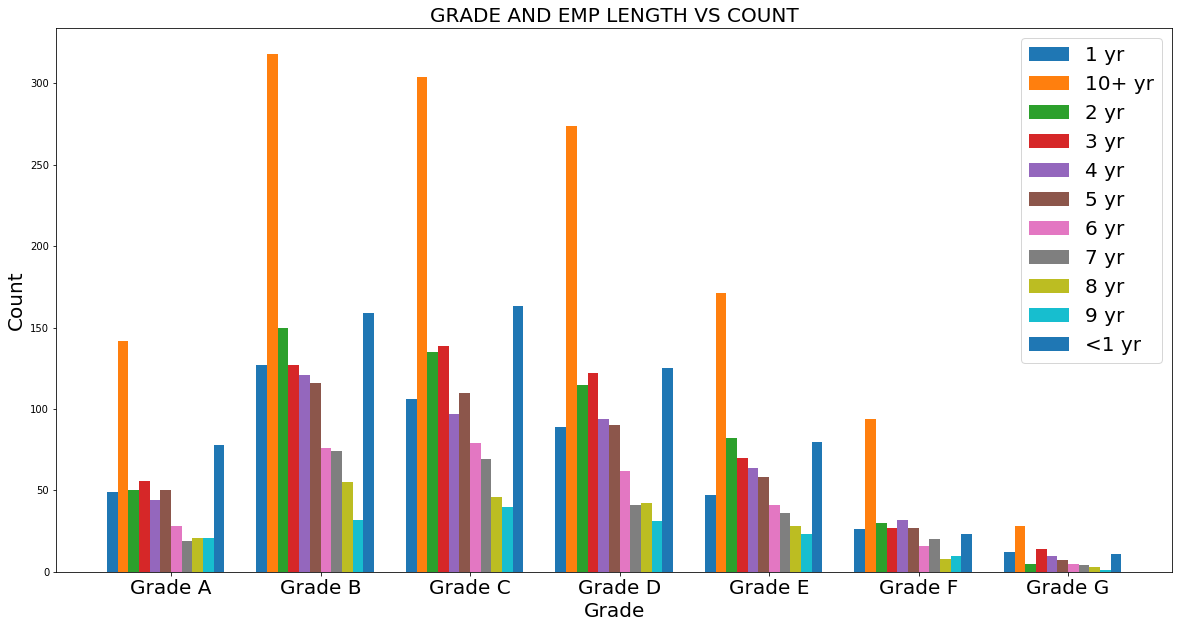

In [56]:
grade_emp_length_rel=data_charged.groupby(["emp_length","grade"]).agg({"loan_status":'count'})
fig,ax=plt.subplots(figsize=(20,10))
index=np.arange(0,49,7)
width=0.5
ax.bar(index-11*width/2,grade_emp_length_rel.loan_status[0:7],width,label="1 yr")
ax.bar(index-9*width/2,grade_emp_length_rel.loan_status[7:14],width,label="10+ yr")
ax.bar(index-7*width/2,grade_emp_length_rel.loan_status[14:21],width,label="2 yr")
ax.bar(index-5*width/2,grade_emp_length_rel.loan_status[21:28],width,label="3 yr")
ax.bar(index-3*width/2,grade_emp_length_rel.loan_status[28:35],width,label="4 yr")
ax.bar(index-width/2,grade_emp_length_rel.loan_status[35:42],width,label="5 yr")
ax.bar(index+width/2,grade_emp_length_rel.loan_status[42:49],width,label="6 yr")
ax.bar(index+3*width/2,grade_emp_length_rel.loan_status[49:56],width,label="7 yr")
ax.bar(index+5*width/2,grade_emp_length_rel.loan_status[56:63],width,label="8 yr")
ax.bar(index+7*width/2,grade_emp_length_rel.loan_status[63:70],width,label="9 yr")
ax.bar(index+9*width/2,grade_emp_length_rel.loan_status[70:77],width,label="<1 yr")
ax.set_xticks(index)
ax.legend(fontsize=20)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"],fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_title("GRADE AND EMP LENGTH VS COUNT",fontsize=20)
ax.set_xlabel("Grade",fontsize=20)

Text(0.5,0,'Grade')

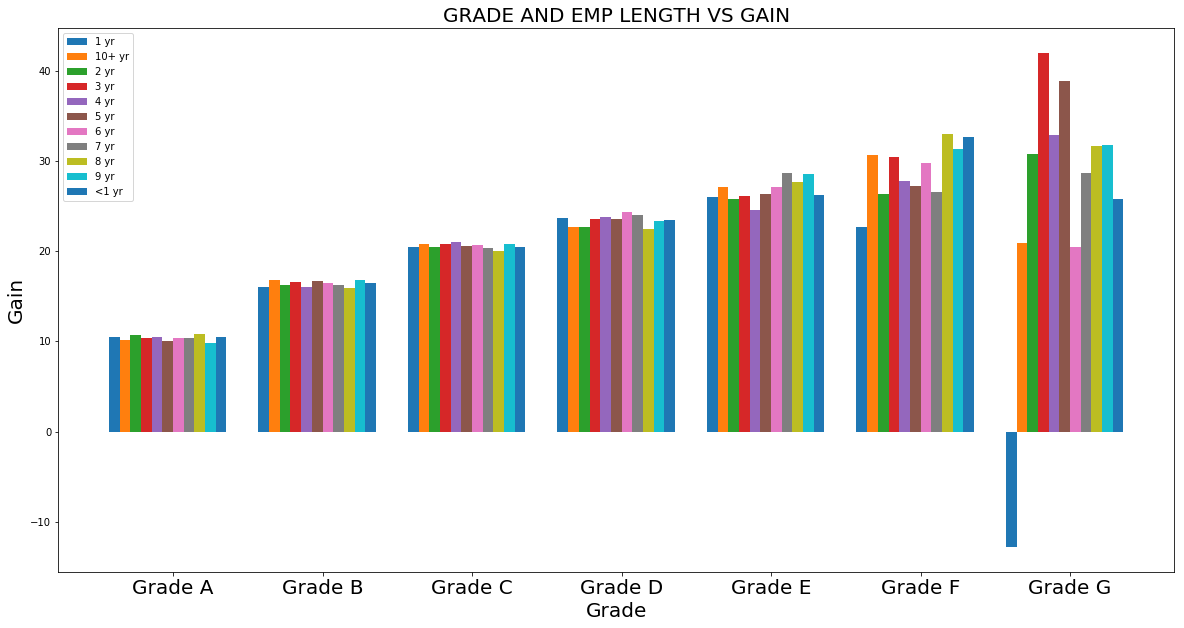

In [57]:
grade_emp_length_rel=data_final.groupby(["emp_length","grade"]).agg({"gain":np.median})
fig,ax=plt.subplots(figsize=(20,10))
index=np.arange(0,49,7)
width=0.5
ax.bar(index-11*width/2,grade_emp_length_rel.gain[0:7],width,label="1 yr")
ax.bar(index-9*width/2,grade_emp_length_rel.gain[7:14],width,label="10+ yr")
ax.bar(index-7*width/2,grade_emp_length_rel.gain[14:21],width,label="2 yr")
ax.bar(index-5*width/2,grade_emp_length_rel.gain[21:28],width,label="3 yr")
ax.bar(index-3*width/2,grade_emp_length_rel.gain[28:35],width,label="4 yr")
ax.bar(index-width/2,grade_emp_length_rel.gain[35:42],width,label="5 yr")
ax.bar(index+width/2,grade_emp_length_rel.gain[42:49],width,label="6 yr")
ax.bar(index+3*width/2,grade_emp_length_rel.gain[49:56],width,label="7 yr")
ax.bar(index+5*width/2,grade_emp_length_rel.gain[56:63],width,label="8 yr")
ax.bar(index+7*width/2,grade_emp_length_rel.gain[63:70],width,label="9 yr")
ax.bar(index+9*width/2,grade_emp_length_rel.gain[70:77],width,label="<1 yr")
ax.set_xticks(index)
ax.legend()
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"],fontsize=20)
ax.set_ylabel("Gain",fontsize=20)
ax.set_title("GRADE AND EMP LENGTH VS GAIN",fontsize=20)
ax.set_xlabel("Grade",fontsize=20)

 Both the barcharts support each other.
 For the first barchart, the counts of 10+emp length being charged off is the maximum for each grade followed by less than 1year.
There is an overall decrease in the countss as we go from grade A to G.
The same thing is supported by the VS GAIN plot where the gain increases along the grades in all the emp length categories.


In [58]:
grade_purpose_rel=data_charged.groupby(["purpose","grade"]).agg({"loan_status":'count'})

Text(0.5,0,'Grade')

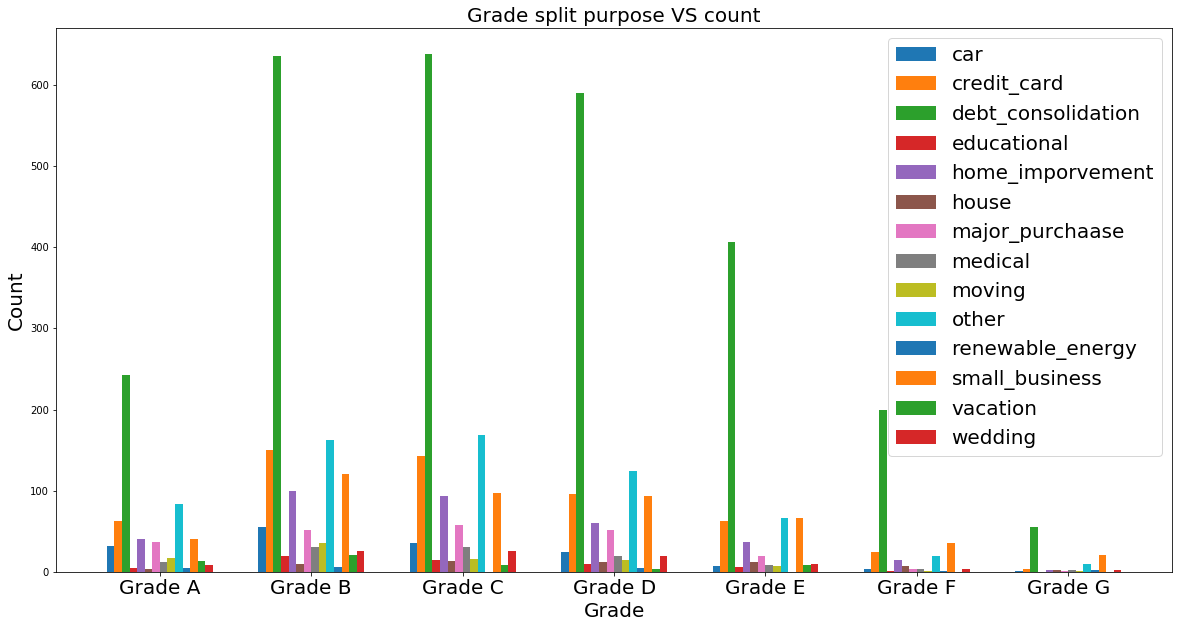

In [59]:
fig , ax=plt.subplots(figsize=(20,10))
index=np.arange(0,70,10)
width=0.5
edu=np.array([0,10,20,30,40,50])
ren=np.array([0,10,30,50,60])
vac=np.array([0,10,20,30,40])
ax.bar(index-13*width/2,grade_purpose_rel.loan_status[0:7],width,label="car")
ax.bar(index-11*width/2,grade_purpose_rel.loan_status[7:14],width,label="credit_card")
ax.bar(index-9*width/2,grade_purpose_rel.loan_status[14:21],width,label="debt_consolidation")
ax.bar(edu-7*width/2,grade_purpose_rel.loan_status[21:27],width,label="educational")
ax.bar(index-5*width/2,grade_purpose_rel.loan_status[27:34],width,label="home_imporvement")
ax.bar(index-3*width/2,grade_purpose_rel.loan_status[34:41],width,label="house")
ax.bar(index-width/2,grade_purpose_rel.loan_status[41:48],width,label="major_purchaase")
ax.bar(index+width/2,grade_purpose_rel.loan_status[48:55],width,label="medical")
ax.bar(index+3*width/2,grade_purpose_rel.loan_status[55:62],width,label="moving")
ax.bar(index+5*width/2,grade_purpose_rel.loan_status[62:69],width,label="other")
ax.bar(ren+7*width/2,grade_purpose_rel.loan_status[69:74],width,label="renewable_energy")
ax.bar(index+9*width/2,grade_purpose_rel.loan_status[74:81],width,label="small_business")
ax.bar(vac+11*width/2,grade_purpose_rel.loan_status[81:86],width,label="vacation")
ax.bar(index+13*width/2,grade_purpose_rel.loan_status[86:93],width,label="wedding")
ax.legend(fontsize=20)
ax.set_title("Grade split purpose VS count",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_xticks(index)
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"],fontsize=20)
ax.set_xlabel("Grade",fontsize=20)

In [60]:
### We can see that iin each grade, debt_consolidation purpose has the most Charged-off cases followed by other as the purpose.

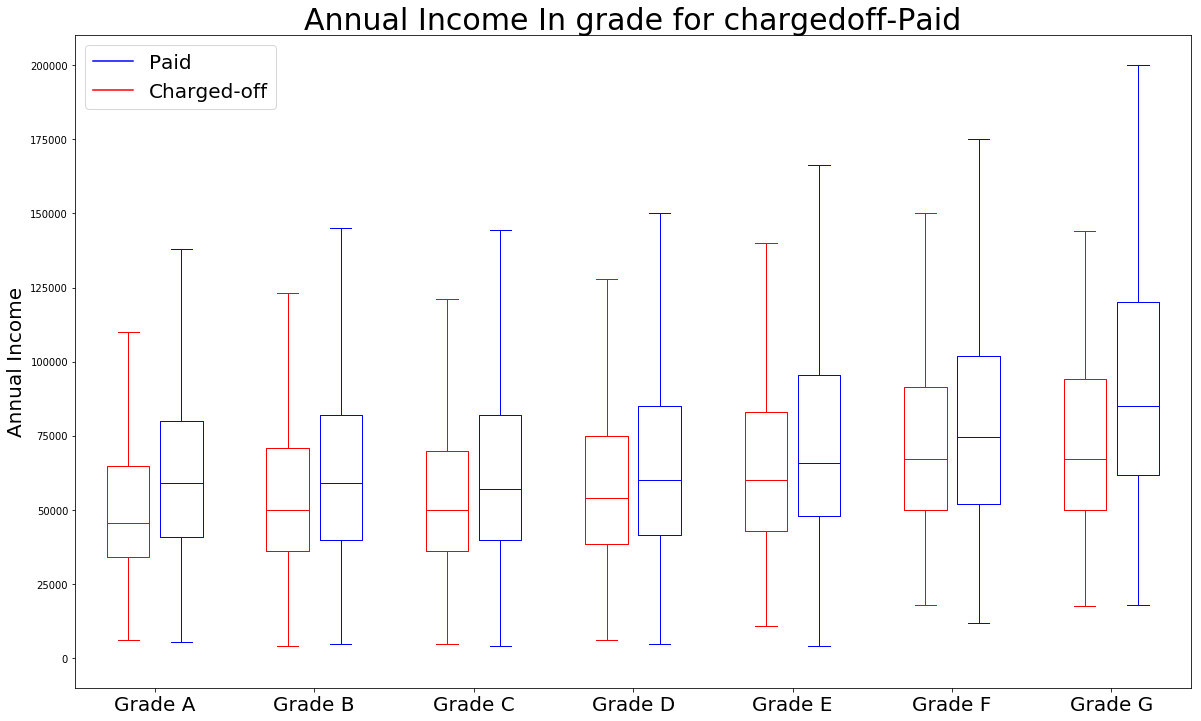

In [61]:
from pylab import setp
def setBoxColors(bp):
    setp(bp['boxes'][0], color='red')
    setp(bp['caps'][0], color='red')
    setp(bp['caps'][1], color='red')
    setp(bp['whiskers'][0], color='red')
    setp(bp['whiskers'][1], color='red')
#     setp(bp['fliers'][0], color='red')
#     setp(bp['fliers'][1], color='red')
    setp(bp['medians'][0], color='red')

    setp(bp['boxes'][1], color='blue')
    setp(bp['caps'][2], color='blue')
    setp(bp['caps'][3], color='blue')
    setp(bp['whiskers'][2], color='blue')
    setp(bp['whiskers'][3], color='blue')
#     setp(bp['fliers'][2], color='blue')
#     setp(bp['fliers'][3], color='blue')
    setp(bp['medians'][1], color='blue')
temp=data_charged.sort_values(by="grade").copy()
a=temp[temp["grade"]=="A"].annual_inc
b=temp[temp["grade"]=="B"].annual_inc
c=temp[temp["grade"]=="C"].annual_inc
d=temp[temp["grade"]=="D"].annual_inc
e=temp[temp["grade"]=="E"].annual_inc
f=temp[temp["grade"]=="F"].annual_inc
g=temp[temp["grade"]=="G"].annual_inc

TEMP=data_paid.sort_values(by="grade").copy()
A=TEMP[TEMP["grade"]=="A"].annual_inc
B=TEMP[TEMP["grade"]=="B"].annual_inc
C=TEMP[TEMP["grade"]=="C"].annual_inc
D=TEMP[TEMP["grade"]=="D"].annual_inc
E=TEMP[TEMP["grade"]=="E"].annual_inc
F=TEMP[TEMP["grade"]=="F"].annual_inc
G=TEMP[TEMP["grade"]=="G"].annual_inc

fig,ax=plt.subplots(figsize=(20,12))
bp=ax.boxplot([a,A],positions=[1,2],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([b,B],positions=[4,5],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([c,C],positions=[7,8],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([d,D],positions=[10,11],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([e,E],positions=[13,14],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([f,F],positions=[16,17],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([g,G],positions=[19,20],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
ax.set_xticks(np.linspace(1.5,19.5,7))
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"],fontsize=20)
ax.set_ylabel("Annual Income",fontsize=20)
ax.set_title("Annual Income In grade for chargedoff-Paid",fontsize=30)
ax.set_xlim(0,21)
hB, = ax.plot([1,1],'b-')
hR, = ax.plot([1,1],'r-')
ax.legend((hB, hR),('Paid', 'Charged-off'),fontsize=20)
hB.set_visible(False)
hR.set_visible(False)

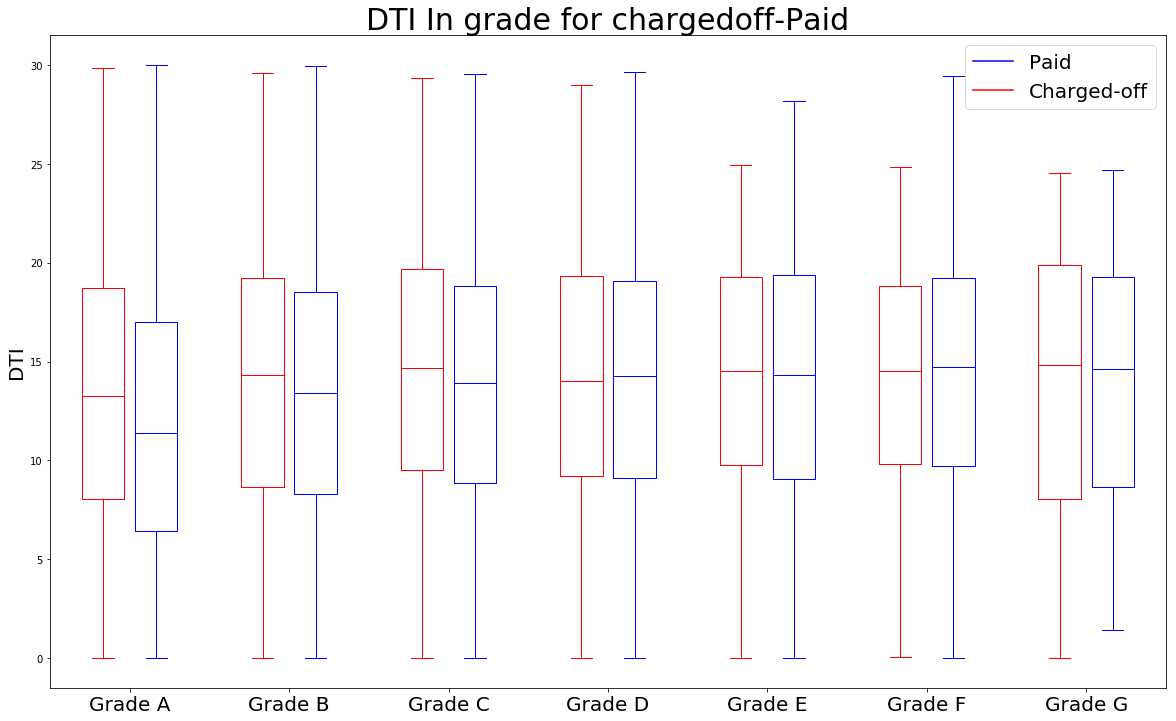

In [62]:
temp=data_charged.sort_values(by="grade").copy()
a=temp[temp["grade"]=="A"].dti
b=temp[temp["grade"]=="B"].dti
c=temp[temp["grade"]=="C"].dti
d=temp[temp["grade"]=="D"].dti
e=temp[temp["grade"]=="E"].dti
f=temp[temp["grade"]=="F"].dti
g=temp[temp["grade"]=="G"].dti

TEMP=data_paid.sort_values(by="grade").copy()
A=TEMP[TEMP["grade"]=="A"].dti
B=TEMP[TEMP["grade"]=="B"].dti
C=TEMP[TEMP["grade"]=="C"].dti
D=TEMP[TEMP["grade"]=="D"].dti
E=TEMP[TEMP["grade"]=="E"].dti
F=TEMP[TEMP["grade"]=="F"].dti
G=TEMP[TEMP["grade"]=="G"].dti

fig,ax=plt.subplots(figsize=(20,12))
bp=ax.boxplot([a,A],positions=[1,2],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([b,B],positions=[4,5],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([c,C],positions=[7,8],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([d,D],positions=[10,11],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([e,E],positions=[13,14],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([f,F],positions=[16,17],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
bp=ax.boxplot([g,G],positions=[19,20],showfliers=False,widths=[0.8,0.8])
setBoxColors(bp)
ax.set_xticks(np.linspace(1.5,19.5,7))
ax.set_xticklabels(["Grade A","Grade B","Grade C","Grade D","Grade E","Grade F","Grade G"],fontsize=20)
ax.set_ylabel("DTI",fontsize=20)
ax.set_title("DTI In grade for chargedoff-Paid",fontsize=30)
ax.set_xlim(0,21)
hB, = ax.plot([1,1],'b-')
hR, = ax.plot([1,1],'r-')
ax.legend((hB, hR),('Paid', 'Charged-off'),fontsize=20)
hB.set_visible(False)
hR.set_visible(False)

### Summary of visualisations
   <ul>
   <li>The <strong>Loan Amount</strong> of the Charged-off people is greater than that of Fully-Paid.A loan amount of roughly 12000 and above is most is likely to default.
   <li>The <strong>debt to income ratio (dti)</strong> of defaulters is greater. The median dti is around 14-15
   <li>The <strong>annual income</strong> of the defaulters is less with median around 50000 per month
   <li>The <strong>Interest Rate</strong> of the defaulters is significantly higher with a median of about 0.17 while that that of the non-defaulters is below 0.125
   <li>People with more than 1 <strong>Inquery in last 6 months</strong> are likely to default.
   <li><strong>Grades</strong> B,C,D have the most defaulters in count and give very less gain to the bank
   <li>36 months <strong>term</strong> loans are likely to default more often than 60 months term loans
   <li><strong>Emp Length</strong> of 10+ years and less than 1 year are likely to default . Emp-length of 2-5 years are also of some concern 
   <li>People with <strong>House Ownership</strong> as Rent or Mortgage have high chances of defaulting.
   <li>People With Loan <strong>purpose</strong> as debt consolidation and "other" are likely to default
   </ul>

### Using ANOVA to select top 70% percentile important features from a desired subset and also from the whole numeric set 

In [63]:
from sklearn.feature_selection import SelectPercentile


In [64]:
interested_int_col=["loan_amnt","installment","annual_inc","dti","inq_last_6mths","open_acc","revol_util","pub_rec","pub_rec_bankruptcies"]

In [65]:
req_cat_col=["term","grade","emp_length","home_ownership","purpose"]

In [66]:
from sklearn.preprocessing import LabelEncoder
dummy=data_final[req_int_col+req_cat_col].copy()
le=LabelEncoder()
le.fit(dummy["emp_length"])
dummy["emp_length"]=le.transform(dummy["emp_length"].values)
le.fit(dummy["term"])
dummy["term"]=le.transform(dummy["term"].values)
dummy=pd.get_dummies(dummy)

In [67]:
select3=SelectPercentile(percentile=70)

select3.fit(dummy.iloc[:,2:].values,data_final.loan_status)
select3.transform(dummy.iloc[:,2:].values)

col_selected=dummy.columns[2:][select3.get_support()]
print("Selected columns After Anova- \n")
print(col_selected)

Selected columns After Anova- 

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'term',
       'emp_length', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_other', 'purpose_small_business',
       'purpose_wedding'],
      dtype='object')


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Using the Recursive Feature Elimintaion (RFE) technique to view top 11 most imp. features

In [68]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [69]:
rfe2=RFE(RandomForestClassifier(n_estimators=100,random_state=1),n_features_to_select=11)
rfe2.fit(dummy.iloc[:,2:],data_final.loan_status)
rfe2.transform(dummy.iloc[:,2:])
print("Selected columns After Anova \n-")
print(dummy.columns[2:][rfe2.get_support()])

Selected columns After Anova 
-
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'term', 'emp_length',
       'home_ownership_RENT', 'purpose_debt_consolidation'],
      dtype='object')


### Summary of Automated Feature Selection
After Running The RFE and ANOVA , we find our results from the visualizations and the Statistical and Automated Feature Selection to be highly similar. 
